# Machine Learning Master Notes 2 - Overview of Linear Regression (One Feature)

## Supervised Learning

In supervised learning, we will be using multiple features to predict an outcome. To have a better understanding of regression model, we simplified into one feature and one outcome. 

In the example of predicting housing prices, we will be using the size of the house as a basis to predict housing price. Please note that in reality, we may be using more characteristics such as location, number of rooms and age of the house etc to have better predictions. 

In our introduction of Linear Regression, we will start with one characteristics. 

In the terminology of machine learning, these characteristics are known as features. Thus, we will be showing linear regression with one feature.


## Linear Regression (One Feature)

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Prepare Data

In [2]:
# read data from data file
df = pd.read_csv('./data/housing_one_var.csv')

In [3]:
df.head()

,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


As shown above, the first column is the size of the house and the second column is the price of the house. 

We need to split both columns into x and y. Size of the housing will be `x` and the prices of house will be `y`. 

In practice, we usually split the data into training set and test set. For simplification, we consider all data as training data set. Thus the feature set will be named as `x_train`. The expected outcome will be labeled as `y_train`.

In [4]:
# split the input features into x_train 
# There is no test data, so all of the data are training data
x_train = df['sqft']
x_train.head()

0    2104
1    1600
2    2400
3    1416
4    3000
Name: sqft, dtype: int64

In [5]:
# split the output features into y_train 
# there is no test data, so all of the data are training data
y_train = df['price']
y_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

## Basics of Linear Regression

The simplest form of machine learning algorithm is linear regression. In Statistics, we use linear regression to make simple predictions by drawing a straight line to fit the data trend. We make predictions by moving the variable on the straight line.

To draw a straight line in a graph, we use the formula:

$$y = b + wx$$

Where:
- $x$ and $y$ are the axis on the graph 
- $b$ is the fixed constant (a.k.a. y-intercept) 
- $w$ is the weight of $x$ (a.k.a gradient of the slope)

Alternatively, some textbook also use the following formula:

$$y = w_0 + w_1x$$

Where 
- $w_0$ is the same as $b$, 
- $w_1$ refers to the weight of $x$ 

We can also rewrite the formula above as a function of $x$:

$$f_{w,b}(x) = b + wx$$
	
Or in simpler form

$$f(x) = b + wx$$


To estimate the housing price, we need to draw a trend line that fits the data. Once we plot a straight line that fits the data trend, then we we can estimate the value of y by moving the x value along the straight line.

Let us start by plotting the data first.

We can plot the chart as follows:

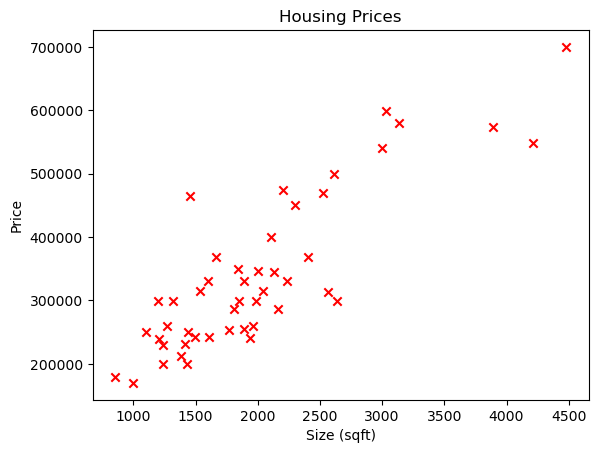

In [6]:
# Scatter plot of housing prices with corresponding house size
fig = plt.figure()
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

We can draw a prediction line by determine the $b$ and $w$. To compute the housing price $y$ we use the formula:
$y = b + wx$

In [7]:
def compute_prediction_line(x,b,w):
    m = len(x)
    f = np.zeros(m)
    for i in range(m):
        f[i] = (x[i] * w) + b
        
    return f

**Let us assume $b$ is $200$ and $w$ is $170$.**

In [8]:
# Let us assume b is 200 and w is 170.
b = 200
w = 170
y = compute_prediction_line(x_train,b,w)

If we draw a straight line as a rough estimation, we achieve our purpose of estimating housing prices.


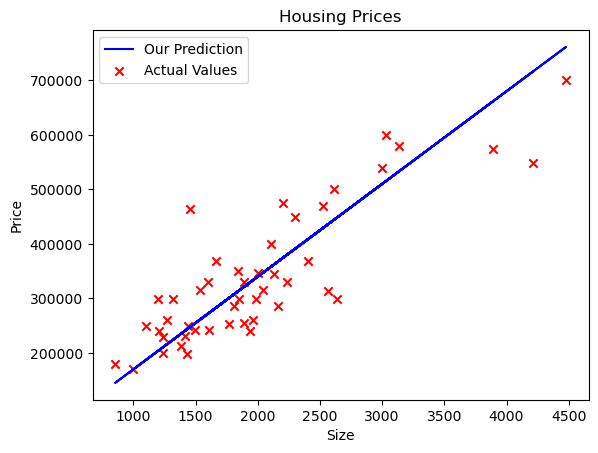

In [9]:
fig = plt.figure()
# Plot our model prediction
plt.plot(x_train, y, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Size')
plt.legend()
plt.show()

The above plot is drawn by **guessing** the b and w.

In machine learning, we will be computing b and w using the linear regression formula.

For the time being let's assume that the fitted line is b = 200, w = 170. What is the prediction if you want to sell a house at 3000 sq ft? 

We can compute using the following function.

In [10]:
def prediction_house_price(x,b,w):
    y_predict = (x * w) + b
    return y_predict

In [11]:
estimated_price = prediction_house_price(3000,b,w)
print(f"Estimated selling price of a house with {3000:,}sqft is ${estimated_price:,}.")

Estimated selling price of a house with 3,000sqft is $510,200.


## Linear Regression in Machine Learning 

We begin Linear Regression with one variable. In linear regression, we must first fit the straight line to the data trend. Using the straight line formula above. We form a hypothesis where

$$f(x) =b + wx$$

We also use $m$ to denote the number of training examples. To refer to each training example, we use $x^{(i)}$ and $y^{(i)}$ in the formula:

$$f(x^{(i)})  =b +wx^{(i)}$$

The $(i)$ in this context refers to each line of record or each data set. Please note that this is **Not exponent**, it refers to ith training examples.

In summary, our straight line in machine learning is written as follows:

$$f(x^{(i)}) =b +wx^{(i)}$$ 


The main challenge is to find the straight line that fits best to the data trend. In Statistics, we can use a formula (**Normal Equation**) to estimate the best fit line and thus also estimate the best value for w and b. This method is not used in machine learning because, when the data get large, the computation becomes more difficult. 

In machine learning, we use computer programs to iteratively find the best fit. In this context, (w) and (b) are also known as **learning parameters**. It is also known as **coefficients or weights** and **intercept**.

Once we have the best-fit line with its parameters (w) and (b). We can make predictions using a new x.

For prediction of $y$ or $f(x)$, we can rewrite the formula as the following:

$$\hat y = b + wx$$

where $\hat y$  refers to the prediction  and $y$ refers to a known outcome.

### Glossory
The following is a list of common machine learning terminology, its mathematical notation and commonly used name in Python:

|Term|Definition|Math Notation|Common Names Used in Python|
|---|---|---|---|
|dataset or dataframe|This refers to the data we are working on|-|`df`|
|features or input features|This usually refers to the independent input features that we want to work on. In the case of predicting housing prices, features refer to the housing size. We must have at least one feature. Usually we have more features to make our prediction more accurate|$x$|`x`|
|target or expected outcome|This usually refers to the expected outcome|$y$|`y`|
|prediction|This usually refer to the prediction computed by the ML model|$\hat{y}$|`y_hat` or `yhat` or `y_predict`|
|intercept|This refers to the intercept of the linear equation|$b$|`b`|
|weights or coeficient| This refers to the slope of the linear equation|$w$|`w`|
|learning parameters| In regression model, the learning parameters are $b$ and $w$|$b$ and $w$|`b` and `w`|
|training set or training examples|This refers to the training dataset that we are going to use to run throught the ML model. It contains the features input in `x` and expected outcome in `y`|-|`x_train` and `y_train`|
|test set| This is separate dataset that is carved out from the original data frame for testing purpose|-|`x_test` and `y_test`|
| number of training examples| This refers to how many examples we have in `x_train`|$m$|`m`|
|(i)th training examples|Refers to the individual training example in rows|$x^{(i)}$|`x_i`|

## End of Note 2